In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Generate some toy user and movie data

# Number of users
n_users = 100

# Number of movies
n_movies = 10

# Number of ratings
n_ratings = 1000

# Generate random user ids
user_ids = np.random.randint(0, n_users, n_ratings)

# Generate random movie ids
movie_ids = np.random.randint(0, n_movies, n_ratings)

# Generate random ratings
ratings = np.random.randint(1, 6, n_ratings)

# Create a dataframe with the data
df = pd.DataFrame({'user_id': user_ids, 'movie_id': movie_ids, 'rating': ratings})

# We should not have any duplicate ratings for the same user and movie
# Drop any rows that have duplicate user_id and movie_id pairs
df = df.drop_duplicates(['user_id', 'movie_id'])


In [3]:
df

,user_id,movie_id,rating
0,98,2,2
1,76,2,1
2,98,9,4
3,11,6,5
4,97,7,4
...,...,...,...
991,65,5,3
992,75,4,3
996,72,7,2
997,20,8,4


In [4]:
# Create a user-item matrix

A = df.pivot(index='user_id', columns='movie_id', values='rating')
A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,3.0,3.0,NaN,3.0,5.0,NaN,3.0,3.0,1.0
1,NaN,4.0,5.0,NaN,3.0,2.0,2.0,3.0,NaN,NaN
2,NaN,1.0,5.0,NaN,4.0,NaN,1.0,3.0,1.0,NaN
3,NaN,NaN,NaN,1.0,3.0,5.0,4.0,2.0,NaN,5.0
4,5.0,1.0,5.0,5.0,NaN,3.0,NaN,3.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...
95,NaN,4.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,2.0
96,1.0,1.0,2.0,3.0,5.0,NaN,NaN,NaN,NaN,2.0
97,4.0,NaN,NaN,4.0,1.0,NaN,4.0,4.0,2.0,2.0


In [5]:
# Fill in the missing values with zeros
A = A.fillna(0)

A

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,3.0,3.0,0.0,3.0,5.0,0.0,3.0,3.0,1.0
1,0.0,4.0,5.0,0.0,3.0,2.0,2.0,3.0,0.0,0.0
2,0.0,1.0,5.0,0.0,4.0,0.0,1.0,3.0,1.0,0.0
3,0.0,0.0,0.0,1.0,3.0,5.0,4.0,2.0,0.0,5.0
4,5.0,1.0,5.0,5.0,0.0,3.0,0.0,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...
95,0.0,4.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0
96,1.0,1.0,2.0,3.0,5.0,0.0,0.0,0.0,0.0,2.0
97,4.0,0.0,0.0,4.0,1.0,0.0,4.0,4.0,2.0,2.0


In [6]:
# Cosine similarity between U1 and U2

# User 1
u1 = A.loc[0]

# User 2
u2 = A.loc[1]

# Compute the dot product
dot = np.dot(u1, u2)

# Compute the L2 norm
norm_u1 = np.linalg.norm(u1)
norm_u2 = np.linalg.norm(u2)

# Compute the cosine similarity
cos_sim = dot / (norm_u1 * norm_u2)
cos_sim

0.7758801774444579

In [7]:
# Calculate the cosine similarity between users
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(A)

pd.DataFrame(sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.775880,0.666163,0.580948,0.603352,0.511208,0.384974,0.432801,0.506664,0.674561,...,0.620946,0.666806,0.919188,0.786796,0.541749,0.544804,0.487417,0.418957,0.566667,0.800075
1,0.775880,1.000000,0.872626,0.450746,0.492767,0.424967,0.503147,0.438832,0.659767,0.483863,...,0.625688,0.777482,0.906955,0.640342,0.333244,0.648464,0.534114,0.328874,0.587788,0.695749
2,0.666163,0.872626,1.000000,0.337862,0.440714,0.217186,0.538772,0.214521,0.757259,0.516827,...,0.545204,0.696088,0.835441,0.403180,0.194834,0.587329,0.641944,0.353690,0.581571,0.625809
3,0.580948,0.450746,0.337862,1.000000,0.522699,0.883883,0.482382,0.715891,0.704416,0.476018,...,0.214724,0.434813,0.450000,0.574289,0.817316,0.412113,0.471940,0.536510,0.580948,0.519984
4,0.603352,0.492767,0.440714,0.522699,1.000000,0.405840,0.449448,0.558341,0.412547,0.825977,...,0.293428,0.615794,0.467354,0.480481,0.410082,0.256804,0.566610,0.665207,0.767421,0.696073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.544804,0.648464,0.587329,0.412113,0.256804,0.093250,0.202410,0.460531,0.547421,0.262781,...,0.868388,0.677672,0.659380,0.556420,0.225221,1.000000,0.777970,0.155311,0.666818,0.545788
96,0.487417,0.534114,0.641944,0.471940,0.566610,0.095346,0.295656,0.400249,0.593647,0.403030,...,0.675580,0.621835,0.539360,0.521515,0.180937,0.777970,1.000000,0.441115,0.855882,0.686837
97,0.418957,0.328874,0.353690,0.536510,0.665207,0.518163,0.459073,0.621478,0.618903,0.718506,...,0.284726,0.565531,0.324523,0.503039,0.536350,0.155311,0.441115,1.000000,0.777098,0.633216
98,0.566667,0.587788,0.581571,0.580948,0.767421,0.334719,0.377426,0.661224,0.692874,0.666939,...,0.665299,0.771136,0.559431,0.615315,0.377964,0.666818,0.855882,0.777098,1.000000,0.812862


<AxesSubplot:>

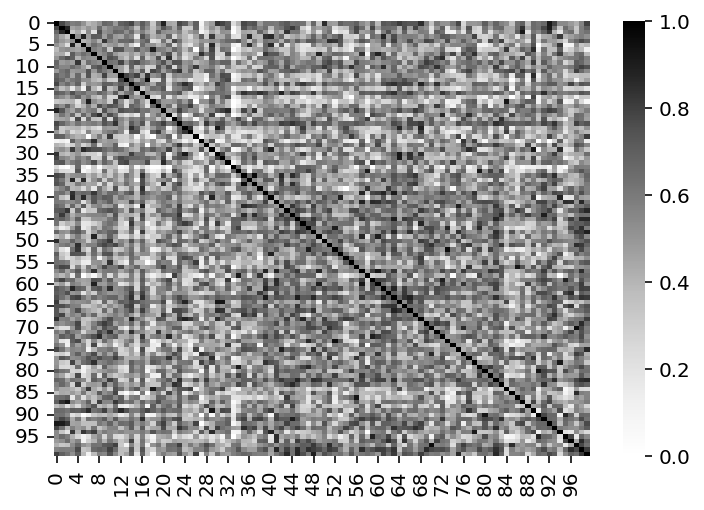

In [8]:
import seaborn as sns

sns.heatmap(sim_matrix, cmap='Greys')


In [9]:
# Find the most similar users to user u 

def k_nearest_neighbors(A, u, k):
    """Find the k nearest neighbors for user u"""
    # Find the index of the user in the matrix
    u_index = A.index.get_loc(u)
    
    # Compute the similarity between the user and all other users
    sim_matrix = cosine_similarity(A)

    # Find the k most similar users
    k_nearest = np.argsort(sim_matrix[u_index])[::-1][1:k+1]
    
    # Return the user ids
    return A.index[k_nearest]

In [10]:
k_nearest_neighbors(A, 0, 5)

Int64Index([92, 20, 50, 68, 30], dtype='int64', name='user_id')

In [11]:
# Show matrix of movie ratings for u and k nearest neighbors

def show_neighbors(A, u, k):
    """Show the movie ratings for user u and k nearest neighbors"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Return the dataframe
    return df

In [12]:
show_neighbors(A, 0, 5)

movie_id,0,1,2,3,4,5,6,7,8,9
user_id,,,,,,,,,,
0,2.0,3.0,3.0,0.0,3.0,5.0,0.0,3.0,3.0,1.0
92,0.0,5.0,5.0,0.0,5.0,4.0,0.0,5.0,3.0,0.0
20,2.0,5.0,4.0,0.0,0.0,4.0,1.0,2.0,4.0,2.0
50,3.0,2.0,0.0,0.0,5.0,4.0,0.0,5.0,4.0,4.0
68,1.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0,3.0,0.0
30,3.0,1.0,1.0,1.0,2.0,4.0,0.0,0.0,4.0,0.0


In [13]:
# Rating for user u for movie 0 is: (4.0 + 3.0) / 2 = 3.5 (Discard 0s)

def predict_rating(A, u, m, k=5):
    """Predict the rating for user u for movie m"""
    # Get the user ids of the k nearest neighbors
    neighbors = k_nearest_neighbors(A, u, k)
    
    # Get the movie ratings for user u and the k nearest neighbors
    df = A.loc[[u] + list(neighbors)]
    
    # Get the ratings for movie m
    ratings = df[m]
    
    # Calculate the mean of the ratings
    mean = ratings[1:][ratings != 0].mean()
    
    # Return the mean
    return mean

In [14]:
predict_rating(A, 0, 0)

2.25

In [15]:
# Now working with real data

# Load the data

df = pd.read_excel("mov-rec.xlsx")
df.head()

,Timestamp,Your name,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
0,2023-04-11 10:58:44.990,Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
1,2023-04-11 10:59:49.617,Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
2,2023-04-11 11:12:44.033,Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
3,2023-04-11 11:13:48.674,Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
4,2023-04-11 11:13:55.658,Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0


In [16]:
# Discard the timestamp column

df = df.drop('Timestamp', axis=1)

# Make the "Your Name" column the index

df = df.set_index('Your name')
df

,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Nipun,4.0,5.0,4.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Eshan Gujarathi,4.0,NaN,5.0,5.0,4.0,5.0,5.0,5.0,NaN,4.0
Sai Krishna Avula,5.0,3.0,3.0,4.0,4.0,5.0,5.0,3.0,3.0,4.0
Ankit Yadav,3.0,3.0,2.0,5.0,2.0,5.0,5.0,3.0,3.0,4.0
Dhruv,NaN,NaN,5.0,5.0,3.0,NaN,5.0,5.0,4.0,5.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Zeel B Patel,5.0,4.0,5.0,4.0,4.0,4.0,NaN,2.0,NaN,5.0
Neel,4.0,NaN,5.0,5.0,3.0,3.0,5.0,5.0,NaN,4.0


In [17]:
df.index

Index(['Nipun', 'Gautam Vashishtha', 'Eshan Gujarathi', 'Sai Krishna Avula',
       'Ankit Yadav ', 'Dhruv', 'Saatvik Rao ', 'Zeel B Patel', 'Neel ',
       'Sachin Jalan ', 'Ayush Shrivastava', '....', 'Hari Hara Sudhan',
       'Etikikota Hrushikesh', 'Chirag', 'Aaryan Darad', 'Hetvi Patel',
       'Kalash Kankaria', 'Rachit Verma', 'shriraj', 'Bhavini Korthi ',
       'Hitarth Gandhi ', 'Radhika Joglekar ', 'Medhansh Singh', 'Arun Mani',
       'Satyam ', 'Karan Kumar ', 'R Yeeshu Dhurandhar', 'Satyam Gupta',
       'rushali', 'shridhar', 'Tanvi Jain ', 'Manish Prabhubhai Salvi ',
       'Varun Barala', 'Kevin Shah ', 'Inderjeet', 'Gangaram Siddam ', 'Aditi',
       'Madhuri Awachar', 'Anupam', 'Jinay', 'Shrutimoy', 'Aadesh Desai',
       'Dhairya', 'Rahul C'],
      dtype='object', name='Your name')

In [18]:
# Get index for user and movie
user = 'Dhruv'

print(user in df.index)

# Get the movie ratings for user
#user_ratings = df.loc[user]
#user_ratings

True


In [19]:
df_copy = df.copy()
df_copy.fillna(0, inplace=True)
show_neighbors(df_copy, user, 5)


,Sholay,Swades (We The People),The Matrix (I),Interstellar,Dangal,Taare Zameen Par,Shawshank Redemption,The Dark Knight,Notting Hill,Uri: The Surgical Strike
Your name,,,,,,,,,,
Dhruv,0.0,0.0,5.0,5.0,3.0,0.0,5.0,5.0,4.0,5.0
shriraj,3.0,2.0,5.0,4.0,2.0,3.0,4.0,5.0,4.0,5.0
Jinay,3.0,1.0,4.0,3.0,4.0,3.0,5.0,5.0,4.0,3.0
Gautam Vashishtha,3.0,4.0,4.0,5.0,3.0,1.0,5.0,5.0,4.0,3.0
Saatvik Rao,4.0,3.0,4.0,5.0,2.0,2.0,4.0,5.0,3.0,5.0
Medhansh Singh,4.0,3.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0


In [20]:
# Predict the rating for user u for movie m

predict_rating(df_copy, user, 'The Dark Knight')

5.0

In [21]:
predict_rating(df_copy, user, 'Sholay')

3.4

In [22]:
# Generic Matrix Factorization (without missing values)

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# D is a matrix of size (n_users, n_movies) randomly generated values between 1 and 5
D = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
D

tensor([[4., 3., 3., 4., 4., 1., 1., 1., 5., 3.],
        [3., 1., 5., 5., 2., 3., 3., 2., 2., 5.],
        [3., 4., 4., 4., 1., 1., 3., 1., 3., 2.],
        [5., 3., 4., 4., 3., 4., 2., 2., 2., 3.],
        [5., 4., 5., 1., 3., 3., 4., 4., 1., 1.],
        [4., 5., 1., 1., 2., 4., 1., 4., 5., 2.],
        [4., 2., 1., 4., 1., 2., 1., 1., 2., 2.],
        [4., 2., 2., 4., 1., 2., 1., 5., 3., 2.],
        [5., 1., 1., 4., 3., 4., 4., 3., 5., 1.],
        [2., 2., 2., 4., 1., 5., 4., 4., 4., 1.],
        [2., 4., 5., 5., 4., 3., 4., 2., 2., 5.],
        [3., 5., 5., 1., 3., 1., 3., 1., 3., 4.],
        [3., 5., 1., 4., 3., 3., 3., 2., 2., 1.],
        [5., 5., 4., 5., 4., 4., 1., 2., 3., 1.],
        [3., 5., 1., 5., 2., 5., 3., 3., 2., 1.],
        [2., 4., 4., 1., 4., 3., 4., 4., 1., 2.],
        [2., 4., 3., 3., 2., 3., 1., 1., 5., 4.],
        [2., 2., 4., 4., 2., 1., 2., 5., 1., 5.],
        [4., 2., 1., 3., 2., 3., 2., 4., 4., 1.],
        [3., 1., 3., 1., 1., 5., 2., 1., 5., 4.],


In [23]:
D.shape

torch.Size([100, 10])

Let us decompose D as AB. A is of shape (n, k) and B is of shape (k, n). We can write the above equation as:
D = AB 

In [24]:
# Randomly initialize A and B

A = torch.randn(n_users, 2, requires_grad=True)
B = torch.randn(n_movies, 2, requires_grad=True)

# Compute the loss

loss = torch.norm(torch.mm(A, B.t()) - D)
loss

tensor(111.2077, grad_fn=<LinalgVectorNormBackward0>)

In [25]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,0.639249,1.358015,0.030638,-0.086800,-0.848678,0.798009,0.141926,2.183101,4.017639,-0.436320
1,0.489252,0.824605,-0.064779,-0.215449,-0.467532,0.470820,0.015148,1.532731,2.797126,-0.345083
2,0.611320,-0.967687,-0.901781,-1.655594,1.109152,-0.713653,-0.850740,0.630157,0.910516,-0.534849
3,0.300554,0.206345,-0.163133,-0.340670,-0.032774,0.093603,-0.121369,0.748497,1.329971,-0.227566
4,-0.442911,-0.185317,0.289191,0.584435,-0.052355,-0.060551,0.230549,-1.026641,-1.806286,0.341514
...,...,...,...,...,...,...,...,...,...,...
95,-0.156855,1.181981,0.614964,1.072665,-1.075892,0.791515,0.624686,0.438792,0.974120,0.185679
96,0.046780,1.348210,0.515292,0.860185,-1.120491,0.872153,0.553955,0.962916,1.909397,0.032866
97,0.820526,-0.342274,-0.817404,-1.558424,0.678028,-0.334563,-0.725520,1.461008,2.459459,-0.668253
98,0.960636,0.808613,-0.460158,-0.985405,-0.231104,0.396325,-0.323030,2.488239,4.443720,-0.719614


In [26]:
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9
0,4.0,3.0,3.0,4.0,4.0,1.0,1.0,1.0,5.0,3.0
1,3.0,1.0,5.0,5.0,2.0,3.0,3.0,2.0,2.0,5.0
2,3.0,4.0,4.0,4.0,1.0,1.0,3.0,1.0,3.0,2.0
3,5.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0
4,5.0,4.0,5.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
95,4.0,2.0,4.0,1.0,1.0,3.0,3.0,5.0,5.0,4.0
96,2.0,4.0,1.0,4.0,2.0,5.0,1.0,4.0,3.0,3.0
97,1.0,2.0,5.0,1.0,3.0,1.0,3.0,4.0,2.0,4.0
98,3.0,3.0,1.0,4.0,2.0,1.0,3.0,4.0,2.0,3.0


In [27]:
# Optimizer

optimizer = optim.Adam([A, B], lr=0.01)

# Train the model

for i in range(1000):
    # Compute the loss
    loss = torch.norm(torch.mm(A, B.t()) - D)
    
    # Zero the gradients
    optimizer.zero_grad()
    
    # Backpropagate
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    
    # Print the loss
    if i % 10 == 0:
        print(loss.item())

111.20771026611328
108.27051544189453
105.80335998535156
103.40086364746094
100.72842407226562
97.58438110351562
93.81680297851562
89.25970458984375
83.7423324584961
77.26307678222656
70.19258117675781
63.19015884399414
56.88321304321289
51.72879409790039
47.9384880065918
45.35057830810547
43.641456604003906
42.52534866333008
41.79496383666992
41.31401443481445
40.99107360839844
40.76564025878906
40.59902572631836
40.467525482177734
40.3569221496582
40.258819580078125
40.16835021972656
40.08271026611328
40.00034713745117
39.92043685913086
39.84257888793945
39.76660919189453
39.69248580932617
39.620243072509766
39.5499267578125
39.48160934448242
39.41535186767578
39.3512077331543
39.28923416137695
39.229454040527344
39.17189407348633
39.11655044555664
39.06340789794922
39.01244354248047
38.96361541748047
38.916866302490234
38.87213897705078
38.82937240600586
38.788490295410156
38.74942398071289
38.712100982666016
38.67644500732422
38.642391204833984
38.609859466552734
38.57879638671875


In [28]:
pd.DataFrame(torch.mm(A, B.t()).detach().numpy())

,0,1,2,3,4,5,6,7,8,9
0,2.877245,2.349408,2.698709,4.299346,2.512763,3.261262,1.645051,2.041291,3.709695,3.603064
1,3.078172,2.634752,2.939233,4.346404,2.733289,3.407181,2.005698,2.346127,3.832465,3.734734
2,2.589829,2.570027,2.624593,2.919368,2.430893,2.628291,2.403398,2.446646,2.827454,2.792843
3,3.156364,2.959182,3.124442,3.919249,2.898377,3.319995,2.578469,2.750297,3.640440,3.574934
4,3.024203,4.092069,3.533165,1.131455,3.243889,2.333030,5.017376,4.316901,2.075642,2.182275
...,...,...,...,...,...,...,...,...,...,...
95,3.160691,3.446825,3.336332,2.915082,3.081992,2.998272,3.561985,3.401173,3.101982,3.101566
96,2.865848,2.545350,2.776134,3.853841,2.579055,3.109865,2.054467,2.307856,3.464347,3.385802
97,2.556723,3.140626,2.850108,1.622281,2.623988,2.187548,3.595559,3.222872,2.113160,2.160327
98,2.566484,2.721295,2.675820,2.528903,2.473780,2.486909,2.735221,2.658010,2.605940,2.595152


In [29]:
pd.DataFrame(D)

,0,1,2,3,4,5,6,7,8,9
0,4.0,3.0,3.0,4.0,4.0,1.0,1.0,1.0,5.0,3.0
1,3.0,1.0,5.0,5.0,2.0,3.0,3.0,2.0,2.0,5.0
2,3.0,4.0,4.0,4.0,1.0,1.0,3.0,1.0,3.0,2.0
3,5.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0
4,5.0,4.0,5.0,1.0,3.0,3.0,4.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
95,4.0,2.0,4.0,1.0,1.0,3.0,3.0,5.0,5.0,4.0
96,2.0,4.0,1.0,4.0,2.0,5.0,1.0,4.0,3.0,3.0
97,1.0,2.0,5.0,1.0,3.0,1.0,3.0,4.0,2.0,4.0
98,3.0,3.0,1.0,4.0,2.0,1.0,3.0,4.0,2.0,3.0


In [30]:
def factorize(D, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    A = torch.randn(D.shape[0], k, requires_grad=True)
    B = torch.randn(D.shape[1], k, requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([A, B], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        loss = torch.norm(torch.mm(A, B.t()) - D)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return A, B, loss

In [31]:
for k in [1, 2, 3, 4, 5, 6]:
    A, B, loss = factorize(D, k)
    print(k, loss.item())

1 41.48448181152344
2 38.06168746948242
3 34.44601821899414
4 30.515527725219727
5 26.882482528686523
6 23.882381439208984


In [32]:
# With missing values

# Randomly replace some entries with NaN

D = torch.randint(1, 6, (n_users, n_movies), dtype=torch.float)
D[torch.rand(D.shape) < 0.5] = float('nan')
D

tensor([[nan, nan, nan, nan, nan, 4., 1., nan, 5., 4.],
        [nan, 1., 3., 4., 4., nan, 2., nan, 5., nan],
        [4., 1., 4., 4., 1., 5., 3., nan, 3., nan],
        [1., nan, nan, 5., nan, 5., nan, nan, 1., nan],
        [nan, nan, nan, 3., 1., nan, 2., 3., nan, nan],
        [nan, nan, 4., nan, nan, 5., 3., 3., nan, nan],
        [nan, nan, nan, nan, nan, 2., 3., 2., 3., nan],
        [4., nan, 3., 4., 2., 5., 3., 5., nan, 2.],
        [4., 4., 4., nan, nan, 2., 4., nan, nan, 3.],
        [1., nan, 4., nan, nan, 3., nan, 2., 2., nan],
        [nan, nan, 2., 5., nan, 3., 2., 5., 3., nan],
        [nan, 2., nan, 3., 5., 2., 3., 5., nan, nan],
        [nan, 5., nan, 5., nan, 4., nan, 3., 2., 5.],
        [nan, nan, 2., nan, nan, nan, nan, 4., 4., 1.],
        [nan, 2., nan, 1., 4., 3., nan, nan, 4., nan],
        [nan, 3., 1., nan, 3., nan, 1., nan, 5., 1.],
        [4., 4., nan, nan, 4., 3., nan, 3., 2., 2.],
        [3., nan, nan, 1., nan, 1., 4., 1., 5., 2.],
        [2., nan, na

In [33]:
A, B, loss = factorize(D, 2)
loss

tensor(nan, grad_fn=<LinalgVectorNormBackward0>)

In [34]:
mask = ~torch.isnan(D)
mask

tensor([[False, False, False, False, False,  True,  True, False,  True,  True],
        [False,  True,  True,  True,  True, False,  True, False,  True, False],
        [ True,  True,  True,  True,  True,  True,  True, False,  True, False],
        [ True, False, False,  True, False,  True, False, False,  True, False],
        [False, False, False,  True,  True, False,  True,  True, False, False],
        [False, False,  True, False, False,  True,  True,  True, False, False],
        [False, False, False, False, False,  True,  True,  True,  True, False],
        [ True, False,  True,  True,  True,  True,  True,  True, False,  True],
        [ True,  True,  True, False, False,  True,  True, False, False,  True],
        [ True, False,  True, False, False,  True, False,  True,  True, False],
        [False, False,  True,  True, False,  True,  True,  True,  True, False],
        [False,  True, False,  True,  True,  True,  True,  True, False, False],
        [False,  True, False,  True, Fal

In [35]:
mask.sum()

tensor(526)

In [36]:
A = torch.randn(D.shape[0], k, requires_grad=True)
B = torch.randn(D.shape[1], k, requires_grad=True)

diff_matrix = torch.mm(A, B.t())-D
diff_matrix

tensor([[        nan,         nan,         nan,         nan,         nan,
         -6.0304e+00, -2.6199e+00,         nan, -4.3819e+00, -3.3468e+00],
        [        nan,  3.7142e+00, -4.9707e+00, -1.3741e+00, -4.6438e+00,
                 nan, -1.5472e-01,         nan, -2.6138e+00,         nan],
        [-2.9280e+00, -1.5343e+00, -5.0341e+00, -5.7782e+00, -1.9360e+00,
         -4.8420e+00, -5.7149e+00,         nan, -2.6162e+00,         nan],
        [-6.0626e+00,         nan,         nan, -6.1760e+00,         nan,
         -4.3476e+00,         nan,         nan, -3.0672e+00,         nan],
        [        nan,         nan,         nan, -7.0873e+00, -3.4614e-01,
                 nan, -5.7674e+00, -3.2510e+00,         nan,         nan],
        [        nan,         nan, -3.1821e+00,         nan,         nan,
         -5.5434e+00, -6.3621e+00, -4.1019e+00,         nan,         nan],
        [        nan,         nan,         nan,         nan,         nan,
         -2.3834e+00, -4.7265e+0

In [37]:
# Mask the matrix
diff_matrix[mask].shape

torch.Size([526])

In [38]:
# Modify the loss function to ignore NaN values

def factorize(D, k):
    """Factorize the matrix D into A and B"""
    # Randomly initialize A and B
    A = torch.randn(D.shape[0], k, requires_grad=True)
    B = torch.randn(D.shape[1], k, requires_grad=True)
    
    # Optimizer
    optimizer = optim.Adam([A, B], lr=0.01)
    
    # Train the model
    for i in range(1000):
        # Compute the loss
        diff_matrix = torch.mm(A, B.t())-D
        diff_vector = diff_matrix[mask]
        loss = torch.norm(diff_vector)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Backpropagate
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
    return A, B, loss

In [39]:
A, B, loss = factorize(D, 2)
loss

tensor(22.5991, grad_fn=<LinalgVectorNormBackward0>)

In [44]:
# Now use matrix factorization to predict the ratings

import torch
import torch.nn as nn
import torch.nn.functional as F

# Create a class for the model

class MatrixFactorization(nn.Module):
    def __init__(self, n_users, n_movies, n_factors=20):
        super().__init__()
        self.user_factors = nn.Embedding(n_users, n_factors)
        self.movie_factors = nn.Embedding(n_movies, n_factors)

    def forward(self, user, movie):
        return (self.user_factors(user) * self.movie_factors(movie)).sum(1)
    

    

In [46]:
model = MatrixFactorization(n_users, n_movies, 2)
model

MatrixFactorization(
  (user_factors): Embedding(100, 2)
  (movie_factors): Embedding(10, 2)
)

In [49]:
model(torch.tensor([0]), torch.tensor([0]))

tensor([2.0891], grad_fn=<SumBackward1>)